# Teste OpenCV

Neste notebook há alguns testes com a biblioteca de visão computacional OpenCV. O objetivo final deste notebook é a relização de estudos sobre o funcionament da bibliteca, e uma possivel aplicação prática no controle de um RV com uma câmera para eviatar colisões.

Instalação de pacotes

In [1]:
%pip install opencv-python matplotlib scipy pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 314.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 334.8 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 715.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 434.6 kB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 586.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 152.7 kB/s eta 0:00:0000:0100:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 420.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 246.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 305.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 387.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 250.2 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━

## Teste 1 - Deteção de bordas

Teste de diferentes algoritmos de deteçãp de bordas

Inicio

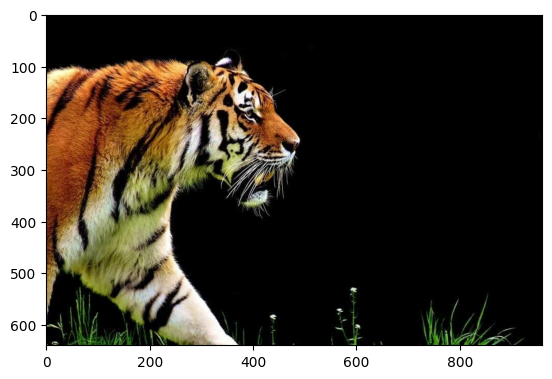

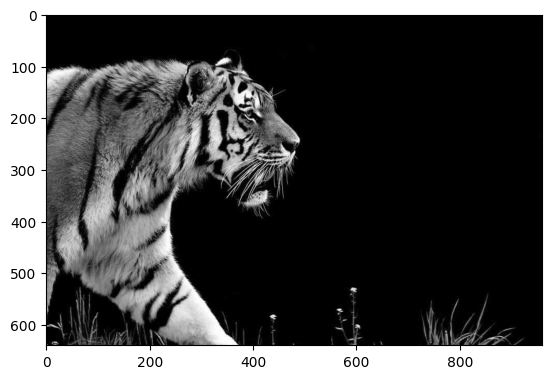

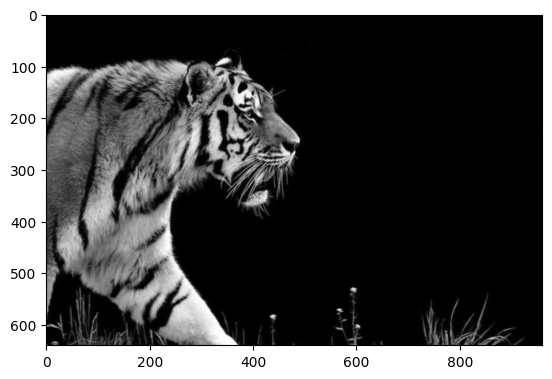

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy
from PIL import Image

# leitura da imagem e plot dela utilizando matplotlib
img = cv2.imread("teste.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# conversão para grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

# blur para melhor detecção de bordas
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

Aplicação do operador de Sobel

In [2]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

display(sobelx)
img = Image.fromarray(np.array(sobelx))
img.show()

display(sobely)
img = Image.fromarray(np.array(sobely))
img.show()

display(sobelxy)
img = Image.fromarray(np.array(sobelxy))
img.show()

array([[    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,  -819., -1392., ...,     0.,     0.,     0.],
       [    0., -1367., -2616., ...,     0.,     0.,     0.],
       [    0., -1614., -3196., ...,     0.,     0.,     0.]])

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [4340., 4039., 3094., ...,    0.,    0.,    0.],
       [4244., 3997., 3170., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0., -301., -644., ...,    0.,    0.,    0.],
       [   0., -247., -580., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

Detecçao de bordas

In [3]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
img = Image.fromarray(np.array(edges))
img.show()

## Teste 2 - Feed de video da camera

In [4]:
import numpy as np
import cv2 as cv

# Para achar os dispositivos de video use
# 1: cd /dev
# 2: ls -a | grep video
# Algum dos dispositivos listados aqui vai ser o dispositivo de video

cap = cv.VideoCapture("/dev/video0")
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow("frame", gray)
    if cv.waitKey(1) == ord("q"):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

## Teste 3 - Detecção de bordas em feed de video

In [1]:
import cv2 

def canny_edge_detection(frame): 
	# Convert the frame to grayscale for edge detection 
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
	
	# Apply Gaussian blur to reduce noise and smoothen edges 
	blurred = cv2.GaussianBlur(src=gray, ksize=(3, 5), sigmaX=0.5) 
	
	# Perform Canny edge detection 
	edges = cv2.Canny(blurred, 70, 135) 
	# edges = cv2.Sobel(src=blurred, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
	
	return blurred, edges


def main(): 
	# Open the default webcam 
	cap = cv2.VideoCapture("/dev/video0") 
	
	while True: 
		# Read a frame from the webcam 
		ret, frame = cap.read() 
		if not ret: 
			print('Image not captured') 
			break
		
		# Perform Canny edge detection on the frame 
		blurred, edges = canny_edge_detection(frame) 
		
		# Display the original frame and the edge-detected frame 
		#cv2.imshow("Original", frame) 
		cv2.imshow("Blurred", blurred) 
		cv2.imshow("Edges", edges) 
		
		# Exit the loop when 'q' key is pressed 
		if cv2.waitKey(1) & 0xFF == ord('q'): 
			break
	
	# Release the webcam and close the windows 
	cap.release() 
	cv2.destroyAllWindows()

main()